# **9. Evaluación** **del** **modelo** **reentrenado** **de** **detección** **de** **ingredientes**

Después de cada fase de reentrenamiento iterativo del modelo de detección, se realiza una pequeña evaluaci´´on de su desempeño. El modelo reentrenado se evalúa cualitativamente, dado que el conjunto de prueba no resulta representativo tras la incorporación de nuevas clases, y considerando el carácter demostrativo del proyecto junto con las restricciones de tiempo y recursos.

En este módulo se presenta la evaluación realizada con el modelo definitivo, la cual sigue la misma metodología aplicada a lo largo de todo el proceso de reentrenamiento.


In [ ]:
#!pip install torch torchvision torchaudio
#!pip install ultralytics

Cargamos el modelo y mostramos las etiquetas del mismo con sus respectivo índice.

In [ ]:
from ultralytics import YOLO

model = YOLO(r'C:\Users\Javier Ponsin\Desktop\Jorge\Ingredients-detection-YoloV8-1\best_new_6.pt')

In [ ]:
model.names

{0: 'hot-dog',
 1: 'Apple',
 2: 'Artichoke',
 3: 'Asparagus',
 4: 'Bagel',
 5: 'Baked-goods',
 6: 'Banana',
 7: 'Beer',
 8: 'Bell-pepper',
 9: 'Bread',
 10: 'Broccoli',
 11: 'Burrito',
 12: 'Cabbage',
 13: 'Cake',
 14: 'Candy',
 15: 'Cantaloupe',
 16: 'Carrot',
 17: 'Common-fig',
 18: 'Cookie',
 19: 'Dessert',
 20: 'French-fries',
 21: 'Grape',
 22: 'Guacamole',
 23: 'Hot-dog',
 24: 'Ice-cream',
 25: 'Muffin',
 26: 'Orange',
 27: 'Pancake',
 28: 'Pear',
 29: 'Popcorn',
 30: 'Pretzel',
 31: 'Strawberry',
 32: 'Tomato',
 33: 'Waffle',
 34: 'food-drinks',
 35: 'Cheese',
 36: 'Cocktail',
 37: 'Coffee',
 38: 'Cooking-spray',
 39: 'Crab',
 40: 'Croissant',
 41: 'Cucumber',
 42: 'Doughnut',
 43: 'Egg',
 44: 'Fruit',
 45: 'Grapefruit',
 46: 'Hamburger',
 47: 'Honeycomb',
 48: 'Juice',
 49: 'Lemon',
 50: 'Lobster',
 51: 'Mango',
 52: 'Milk',
 53: 'Mushroom',
 54: 'Oyster',
 55: 'Pasta',
 56: 'Pastry',
 57: 'Peach',
 58: 'Pineapple',
 59: 'Pizza',
 60: 'Pomegranate',
 61: 'Potato',
 62: 'Pumpkin

Aplicación del modelo sobre imagen de patata cortada en gajos:

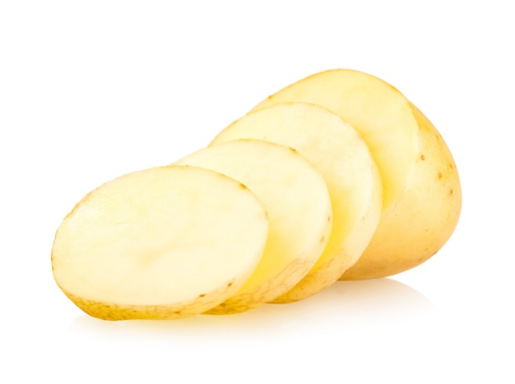

In [ ]:
from matplotlib import pyplot as plt
import urllib
import numpy as np
import cv2
import time

url = 'https://img.freepik.com/fotos-premium/patata-rodajas-aislado-sobre-fondo-blanco_489827-834.jpg'
image_path = "ingredientes_1.jpg"
urllib.request.urlretrieve(url, image_path)

# Read the image in color mode
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Transform to RGB


plt.imshow(image_rgb)
plt.axis('off')
plt.show()

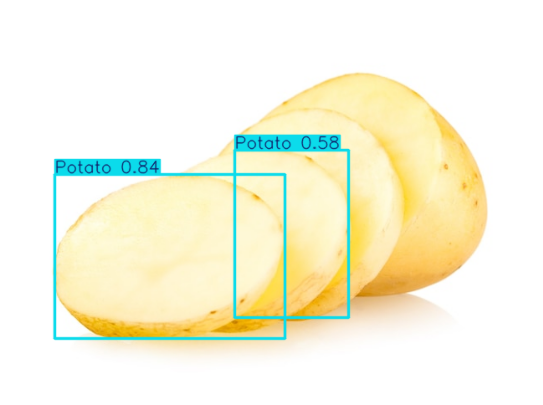

In [ ]:
results = model(image)
for r in results:
    # Extract the original and annotated images
    original_img = r.orig_img[..., ::-1]
    annotated_image_bgr = r.plot()  # BGR numpy array of predictions
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB

    # Plot the annotated image
    plt.figure(figsize=(9, 5))
    plt.imshow(annotated_image_rgb) # RGB PIL image
    plt.axis('off')
    plt.show()

Aplicación del modelo con el resto de imagenes del set de evaluación

In [ ]:
import urllib
import cv2
from matplotlib import pyplot as plt

def download_images(image_urls, plot_images=False):
    """
    Downloads images from the given URLs, converts them to RGB format, and optionally plots them.

    Args:
    image_urls (list of tuples): A list where each tuple contains the image URL and the desired local file path.
    plot_images (bool): If True, the images will be plotted. Defaults to False.

    Returns:
    list: A list of paths where the images have been saved.
    """
    image_paths = []  # Store the local file paths of the images

    for image_url, image_path in image_urls:
        # Download the image from the URL and save it to the local file path
        urllib.request.urlretrieve(image_url, image_path)
        image_paths.append(image_path)  # Add the local file path to the list

        if plot_images:
            # Read the image in color mode
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            # Convert the image from BGR to RGB format
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Plot the image
            plt.figure(figsize=(8, 4))
            plt.imshow(image_rgb)  # Display the image in RGB format
            plt.axis('off')  # Turn off axis labels and ticks
            plt.title(image_path)  # Set the title of the plot as the image path
            plt.show()  # Display the plot

    return image_paths


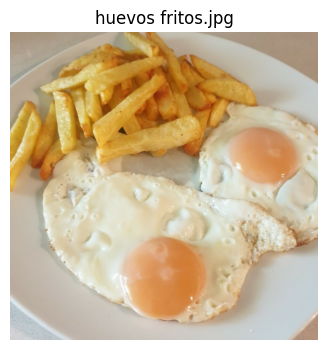

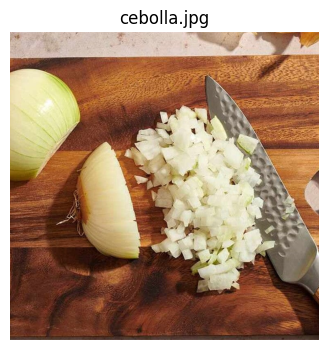

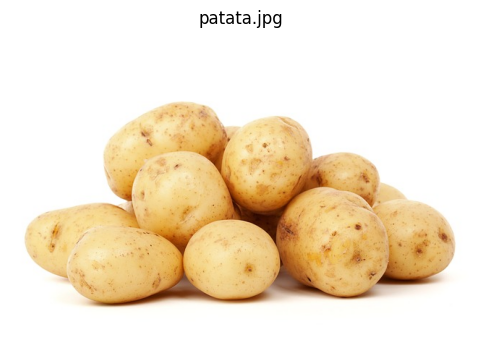

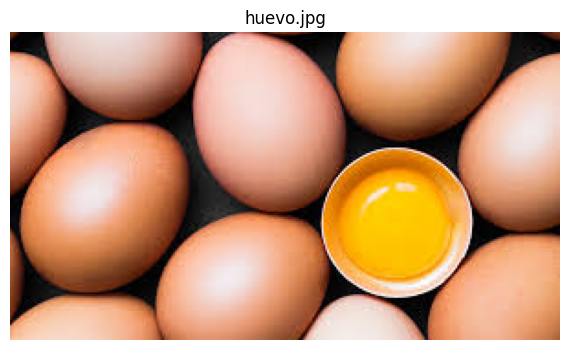

In [ ]:
image_urls = [
    ('https://cdn3.myrealfood.app/s3-myrealfood/recipes/6SqkXyEAQnBABI8gnizO/main_0_1658064712799.jpg', 'huevos fritos.jpg'),
    ('https://granjamagdalena.cl/cdn/shop/products/cebolla-picada-en-cubo-500-g-aprox-congelados-granja-magdalena-139017.jpg?v=1679471834&width=2040', 'cebolla.jpg'),
    ('https://www.frutas-hortalizas.com/img/fruites_verdures/presentacio/59.jpg','patata.jpg'),
    ('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwrD9ci0z5_Kv_owe_UoEp-y-TjBzHGpOk1w&s','huevo.jpg'),

]

image_paths = download_images(image_urls, plot_images=True)


0: 640x640 4 Eggs, 1 Potato, 241.2ms
1: 640x640 3 onions, 241.2ms
2: 640x640 9 Potatos, 241.2ms
3: 640x640 8 Eggs, 241.2ms
Speed: 4.3ms preprocess, 241.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


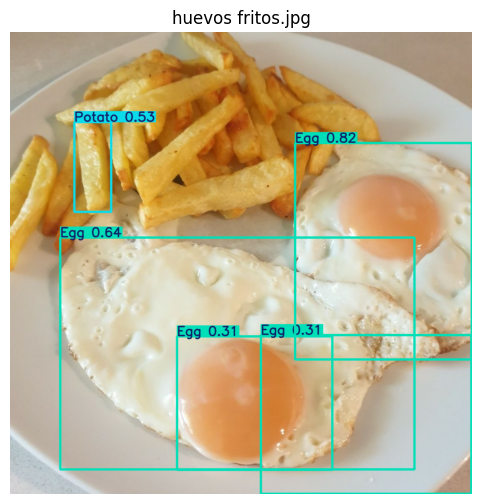

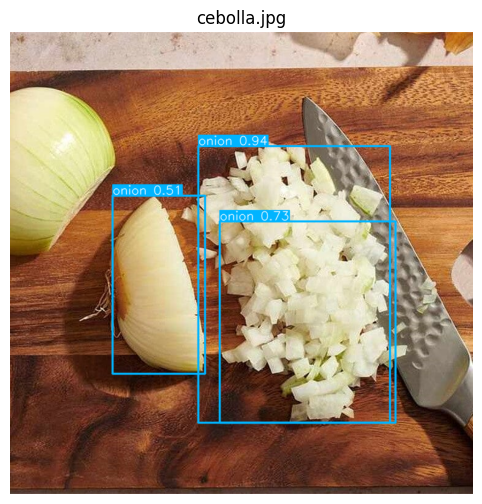

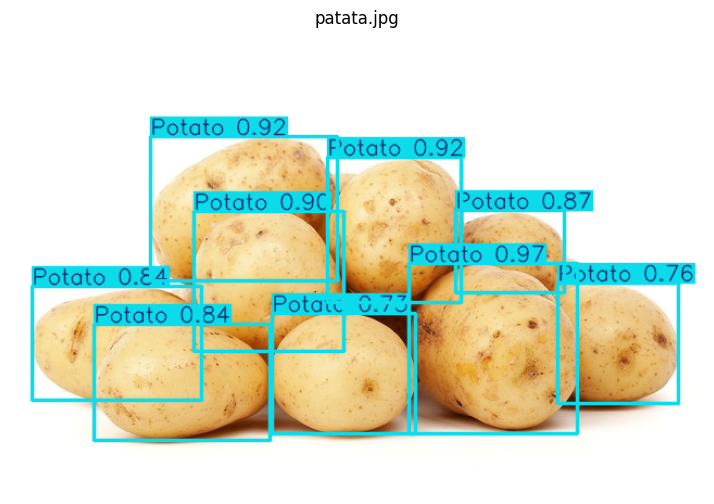

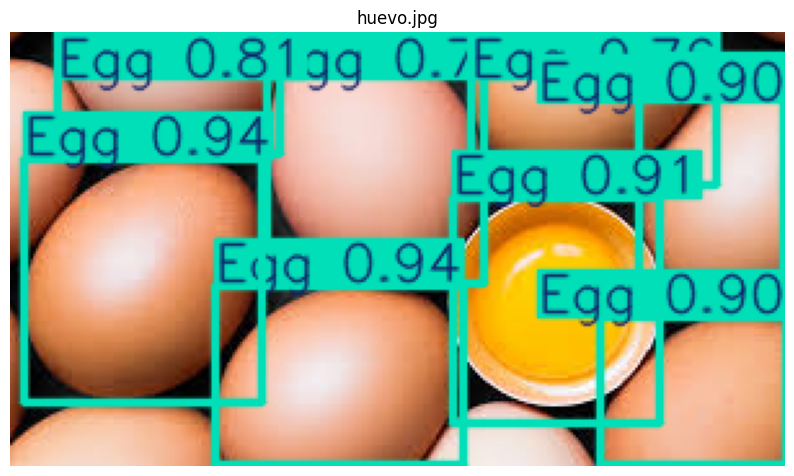

In [ ]:
# Run the model
results = model(image_paths)

# Show results
for i, r in enumerate(results):
    # Extract the original and annotated images
    original_img = r.orig_img[..., ::-1]
    annotated_image_bgr = r.plot()  # BGR numpy array of predictions
    annotated_image_rgb = annotated_image_bgr[..., ::-1]  # Convert BGR to RGB

    # Plot the annotated image
    plt.figure(figsize=(10, 6))
    plt.imshow(annotated_image_rgb) # RGB PIL image
    plt.axis('off')
    plt.title(image_paths[i])
    plt.show()
